In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import numpy as np
import os
from tensorflow.keras.callbacks import ModelCheckpoint


In [3]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(['EIN', 'NAME'], 1)
application_df.head()

C:\Users\12506\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
#Check DataFrame statistics
application_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

<AxesSubplot:>

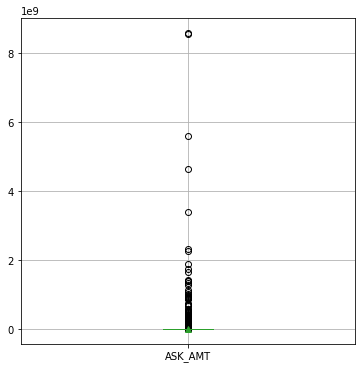

In [7]:
#Plot ASK_AMT to look for outliers
application_df.ASK_AMT.plot.box(figsize=(6,6), showmeans=True, grid=True)

In [8]:
boxplot_stats(application_df.ASK_AMT.values)

[{'mean': 2769198.6820607013,
  'iqr': 2742.0,
  'cilo': 4976.755170031093,
  'cihi': 5023.244829968907,
  'whishi': 11854,
  'whislo': 5000,
  'fliers': array([  108590,   142590,    31452, ...,  3384856,    20197, 36500179],
        dtype=int64),
  'q1': 5000.0,
  'med': 5000.0,
  'q3': 7742.0}]

In [9]:
#Check for outliers in ASK_AMT column
ask_amt=application_df.ASK_AMT.values

ask_amt

array([    5000,   108590,     5000, ...,     5000,     5000, 36500179],
      dtype=int64)

In [10]:
#Calculate quartiles to detect outliers
quartiles=np.quantile(ask_amt,[.25,.75])

iqr=quartiles[1]-quartiles[0]

lower_bound=quartiles[0]-(1.5*iqr)

upper_bound=quartiles[1]+(1.5*iqr)

print(upper_bound)

11855.0


In [11]:
#Check how many rows are outliers in ASK_AMT
application_df.loc[application_df.ASK_AMT>upper_bound]


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
...,...,...,...,...,...,...,...,...,...,...
34280,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,401661,0
34281,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,56261,1
34284,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1


In [12]:
#Check rows where ASK_AMT is over 2 million
application_df.loc[application_df.ASK_AMT>2000000]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
17,T3,Independent,C1000,Heathcare,Trust,1,50M+,N,86380556,0
66,T9,Independent,C1000,ProductDev,Trust,1,10M-50M,N,9955466,1
87,T3,Independent,C4000,Preservation,Trust,1,1M-5M,N,4410503,0
194,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,4108874,1
...,...,...,...,...,...,...,...,...,...,...
34249,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,3999445,0
34250,T3,Independent,C1000,Heathcare,Trust,1,10M-50M,N,14241629,1
34252,T3,Independent,C1000,Preservation,Trust,1,1M-5M,N,3822376,0
34284,T3,CompanySponsored,C1000,Preservation,Association,1,1M-5M,N,3384856,0


In [13]:
#Drop the rows where ASK_AMT> 2 million
application_df=application_df.drop(application_df[application_df['ASK_AMT']>2000000].index)
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [14]:
#Check number of rows in DataFrame
application_df.shape

(33207, 10)

In [15]:
#Check values again in DataFrame without extreme values
application_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,33207.000000,3.320700e+04,33207.000000
mean,0.999849,5.983358e+04,0.535670
std,0.012270,2.053514e+05,0.498734
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,5.000000e+03,1.000000
max,1.000000,1.993324e+06,1.000000


In [16]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts=application_df['APPLICATION_TYPE'].value_counts()
application_type_counts


T3     26084
T4      1537
T6      1205
T5      1147
T19     1065
T8       736
T7       716
T10      526
T9        82
T13       66
T12       24
T2        14
T15        2
T25        1
T29        1
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

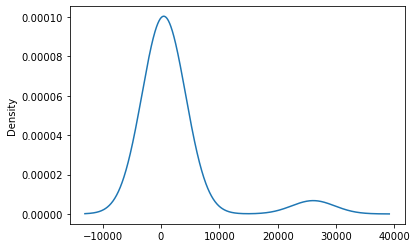

In [17]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [18]:
# Determine which values to replace if counts are less than ...?
replace_application=list(application_type_counts[application_type_counts<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       26084
T4        1537
T6        1205
T5        1147
T19       1065
T8         736
T7         716
T10        526
Other      191
Name: APPLICATION_TYPE, dtype: int64

In [19]:
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    16588
C2000     5911
C1200     4748
C3000     1890
C2100     1868
         ...  
C2500        1
C1570        1
C1283        1
C2380        1
C2150        1
Name: CLASSIFICATION, Length: 69, dtype: int64

<AxesSubplot:ylabel='Density'>

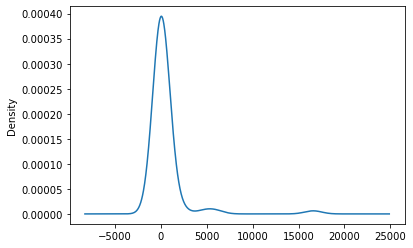

In [20]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [21]:
# Determine which values to replace if counts are less than ..?
replace_class=list(classification_counts[classification_counts<1500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    16588
C2000     5911
C1200     4748
Other     2202
C3000     1890
C2100     1868
Name: CLASSIFICATION, dtype: int64

In [22]:
# Generate our categorical variable lists
application_cat=application_df.dtypes[application_df.dtypes=='object'].index.tolist()

In [23]:
#Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [24]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\12506\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Merge one-hot encoded features and drop the originals
application_df=application_df.merge(encode_df, left_index=True, right_index=True)

application_df=application_df.drop(application_cat,1)

application_df.head()

C:\Users\12506\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Split our preprocessed data into our features and target arrays
y=application_df['IS_SUCCESSFUL'].values

X=application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=78)

C:\Users\12506\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# 2 Hidden layers, more neurons, 'relu' activation, 50 epochs

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features=len(X_train[0])
print(number_input_features)

hidden_nodes_layer1=120

hidden_nodes_layer2=80

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))


# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn1.summary()

43
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               5280      
                                                                 
 dense_1 (Dense)             (None, 80)                9680      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 15,041
Trainable params: 15,041
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile the model
nn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Train the model
nn1.fit(X_train, y_train, epochs=50)

Epoch 1/50
755/755 [==============================] - 3s 2ms/step - loss: 327.9809 - accuracy: 0.5014
Epoch 2/50
755/755 [==============================] - 1s 2ms/step - loss: 162.1643 - accuracy: 0.5077
Epoch 3/50
755/755 [==============================] - 1s 2ms/step - loss: 139.0263 - accuracy: 0.5035
Epoch 4/50
755/755 [==============================] - 1s 2ms/step - loss: 123.1986 - accuracy: 0.5074
Epoch 5/50
755/755 [==============================] - 1s 2ms/step - loss: 107.2861 - accuracy: 0.5062
Epoch 6/50
755/755 [==============================] - 1s 2ms/step - loss: 58.4487 - accuracy: 0.5074
Epoch 7/50
755/755 [==============================] - 1s 2ms/step - loss: 40.3454 - accuracy: 0.5031
Epoch 8/50
755/755 [==============================] - 1s 2ms/step - loss: 55.0557 - accuracy: 0.4992
Epoch 9/50
755/755 [==============================] - 1s 2ms/step - loss: 22.4034 - accuracy: 0.5022
Epoch 10/50
755/755 [==============================] - 1s 2ms/step - loss: 27.4029 - a

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

252/252 - 0s - loss: 0.7020 - accuracy: 0.5196 - 467ms/epoch - 2ms/step
Loss: 0.7020480036735535, Accuracy: 0.5195676684379578


# 6 Hidden layers, 'relu' activation, 50 epochs

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features=len(X_train[0])

hidden_nodes_layer1=120

hidden_nodes_layer2=80

hidden_nodes_layer3=60

hidden_nodes_layer4=30

hidden_nodes_layer5=30

hidden_nodes_layer6=30

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

#Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

#Fourth hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='relu'))

#Fifth hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation='relu'))

#Sixth hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation='relu'))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               5280      
                                                                 
 dense_4 (Dense)             (None, 80)                9680      
                                                                 
 dense_5 (Dense)             (None, 60)                4860      
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 30)                930       
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 1)                

In [33]:
# Compile the model
nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Train the model
nn2.fit(X_train, y_train, epochs=50)

Epoch 1/50
755/755 [==============================] - 2s 2ms/step - loss: 12.6671 - accuracy: 0.5036
Epoch 2/50
755/755 [==============================] - 2s 2ms/step - loss: 1.6800 - accuracy: 0.5209
Epoch 3/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6919 - accuracy: 0.5376
Epoch 4/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.5378
Epoch 5/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6903 - accuracy: 0.5378
Epoch 6/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.5378
Epoch 7/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6903 - accuracy: 0.5378
Epoch 8/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.5378
Epoch 9/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.5378
Epoch 10/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6904 - accuracy: 0.537

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

252/252 - 0s - loss: 0.6898 - accuracy: 0.5448 - 452ms/epoch - 2ms/step
Loss: 0.68982994556427, Accuracy: 0.5447881817817688


# 6 Hidden layers, 'tanh' activation, 50 epochs

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features=len(X_train[0])

hidden_nodes_layer1=120

hidden_nodes_layer2=80

hidden_nodes_layer3=60

hidden_nodes_layer4=30

hidden_nodes_layer5=30

hidden_nodes_layer6=30

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='tanh'))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))

#Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

#Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='tanh'))

#Fifth hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation='tanh'))

#Sixth hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation='tanh'))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 120)               5280      
                                                                 
 dense_11 (Dense)            (None, 80)                9680      
                                                                 
 dense_12 (Dense)            (None, 60)                4860      
                                                                 
 dense_13 (Dense)            (None, 30)                1830      
                                                                 
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 dense_15 (Dense)            (None, 30)                930       
                                                                 
 dense_16 (Dense)            (None, 1)                

In [37]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"

In [38]:
# Compile the model
nn3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
#Create a callback that saves the model's weights every 5 epochs
batch_size=755

cp_callback=ModelCheckpoint(filepath=checkpoint_path, verbose=1,
                           save_weights_only=True,
                           save_freq=5*batch_size)

In [41]:
# Train the model
nn3.fit(X_train, y_train, epochs=50, callbacks=[cp_callback])

Epoch 1/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5260
Epoch 2/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6916 - accuracy: 0.5291
Epoch 3/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6915 - accuracy: 0.5316
Epoch 4/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6914 - accuracy: 0.5360
Epoch 5/50
748/755 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5358
Epoch 5: saving model to checkpoints1\weights.05.hdf5
755/755 [==============================] - 2s 3ms/step - loss: 0.6909 - accuracy: 0.5365
Epoch 6/50
755/755 [==============================] - 2s 3ms/step - loss: 0.6909 - accuracy: 0.5358
Epoch 7/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6908 - accuracy: 0.5362
Epoch 8/50
755/755 [==============================] - 2s 2ms/step - loss: 0.6911 - accuracy: 0.5339
Epoch 9/50
755/755 [==============================] - 2s 2ms/

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

252/252 - 0s - loss: 0.6965 - accuracy: 0.5035 - 472ms/epoch - 2ms/step
Loss: 0.6965155601501465, Accuracy: 0.5035408139228821


In [43]:
#Check weights in Checkpoints folder
os.listdir('checkpoints1')

['weights.05.hdf5',
 'weights.10.hdf5',
 'weights.15.hdf5',
 'weights.20.hdf5',
 'weights.25.hdf5',
 'weights.30.hdf5',
 'weights.35.hdf5',
 'weights.40.hdf5',
 'weights.45.hdf5',
 'weights.50.hdf5']

In [44]:
#Save and export the model
nn3.save('AlphabetSoupCharity_Optimization.h5')